<a href="https://colab.research.google.com/github/lakhdariabderrahmane/3D-Heat-Equation-Simulation-Example-for-Partial-Differential-Equations/blob/main/%D9%85%D8%B9%D8%A7%D8%AF%D9%84%D8%A9_%D9%84%D8%A7%D8%A8%D9%84%D8%A7%D8%B3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D Laplace Equation Solver — Chemical Concentration Simulation

This project simulates the **steady-state distribution of a chemical concentration** in a 2D rectangular region using the **Laplace equation** and the **finite difference method**.

##  Problem Description

We aim to solve the **Laplace equation** in two spatial dimensions:

$$\frac{\partial^2 C}{\partial x^2} + \frac{\partial^2 C}{\partial y^2} = 0\ \ \ \ \ \ \ \ \ \ (1)$$
This describes the **steady-state diffusion** of a chemical substance in a rectangular plate where:

- No chemical reactions are taking place.
- The system has reached equilibrium (no time dependence).
- The material properties are uniform and isotropic.

## Physical Setup

Imagine a thin rectangular plate (or 2D area) of size $1 \times 1$, representing a container or surface where a chemical diffuses.

The boundary conditions are:

-  **Bottom edge (y = 0):** concentration \(C = 100\)
-  **Top edge (y = 1):** concentration \(C = 0\)
-  **Left edge (x = 0):** concentration \(C = 0\)
-  **Right edge (x = 1):** concentration \(C = 0\)

This models a situation where a chemical source is applied at the bottom, and the other edges are kept at zero concentration.

# Mathematical Model
We solve the equation (1) **numerically** using the **finite difference method (FDM)**, by discretizing the domain into a 2D grid and updating each point iteratively based on its neighbors.

## Finite Difference Approximation

Each interior grid point is updated using the rule:

$$
C_{i,j} = \frac{1}{4}(C_{i+1,j} + C_{i-1,j} + C_{i,j+1} + C_{i,j-1})
$$

We apply this rule repeatedly (iterative relaxation) until the change in all points is below a specified **tolerance**.

Converged after 5523 iterations.


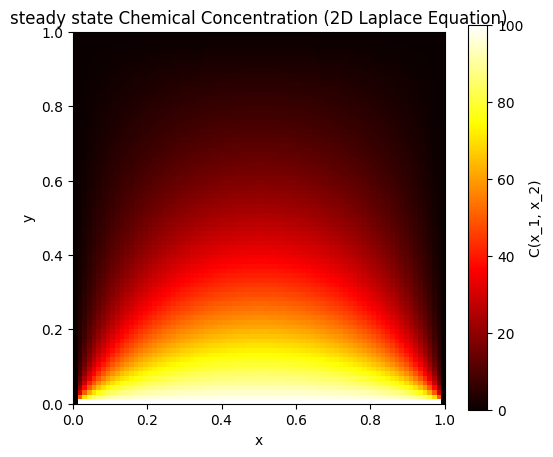

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# عدد النقاط في الشبكة
nx, ny = 80, 80
C = np.zeros((ny, nx))

# الشروط الحدية
C[0, :] = 100  # الحافة السفلية
C[-1, :] = 0   # الحافة العلوية
C[:, 0] = 0    # الحافة اليسرى
C[:, -1] = 0   # الحافة اليمنى

# المعلمات
tolerance = 1e-5
max_iterations = 10000

# طريقة الفروقات المحدودة (تكرار غاوس-سيدل)
for it in range(max_iterations):
    C_old = C.copy()
    for i in range(1, ny-1):
        for j in range(1, nx-1):
            C[i, j] = 0.25 * (C_old[i+1, j] + C[i-1, j] + C_old[i, j+1] + C[i, j-1])

    # التحقق من التقارب
    error = np.max(np.abs(C - C_old))
    if error < tolerance:
        print(f"Converged after {it} iterations.")
        break

# رسم النتيجة
plt.figure(figsize=(6,5))
plt.imshow(C, cmap='hot', origin='lower', extent=[0,1,0,1])
plt.colorbar(label='C(x_1, x_2)')
plt.title('steady state Chemical Concentration (2D Laplace Equation)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()